In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

# Data

In [2]:
from sklearn.datasets import load_iris
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

C:\Users\Erick\Miniconda2\envs\keras\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
iris = load_iris()
iris.data.shape

(150L, 4L)

In [4]:
X_iris, y_iris = iris.data, iris.target
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,
                                                test_size=0.4, random_state=1)
print Xtrain.shape, '\t', ytrain.shape
print Xtest.shape, '\t', ytest.shape

(90L, 4L) 	(90L,)
(60L, 4L) 	(60L,)


# Métodos/algoritmos

### Método: Bayes

In [5]:
from sklearn.naive_bayes import GaussianNB # 1. elección del modelo
model = GaussianNB()                       # 2. instanciar el modelo
model.fit(Xtrain, ytrain)                  # 3. ajustar (entrenar) el modelo en base a los datos
y_model = model.predict(Xtest)             # 4. predecir
y_model
#accuracy_score(ytest, y_model)             # 5. evaluar

array([0, 1, 1, 0, 2, 2, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1, 2,
       0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2, 1, 2,
       0, 0, 0, 1, 0, 0, 2, 2, 2, 2, 2, 1, 2, 1])

### Método: KNN

In [6]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(Xtrain, ytrain)
y_model = knn.predict(Xtest)
accuracy_score(ytest, y_model)

0.96666666666666667

### Método: Regresión logística

In [7]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(Xtrain, ytrain)
y_model = logreg.predict(Xtest)
accuracy_score(ytest, y_model)

0.90000000000000002

### Método: [SVM](http://scikit-learn.org/stable/modules/svm.html)

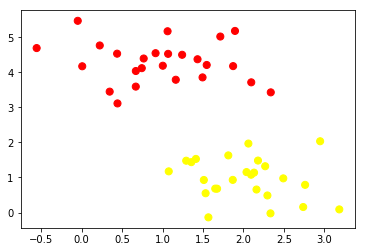

In [8]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

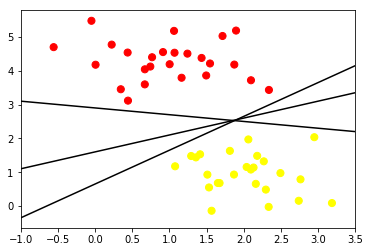

In [9]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    #plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
    #                 color='#AAAAAA', alpha=0.5)

plt.xlim(-1, 3.5);

##### Kernels

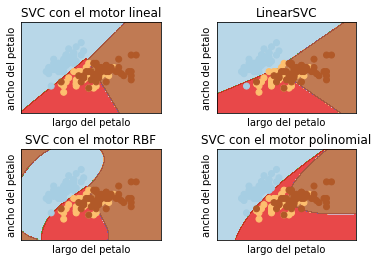

In [10]:
# importando SVM
from sklearn import svm

# importando el dataset iris
iris = load_iris()
X = iris.data[:, :2]  # solo tomamos las primeras 2 características
y = iris.target

h = .02  # tamaño de la malla del grafico

# Creando el SVM con sus diferentes métodos
C = 1.0  # parametro de regulacion SVM 
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
lin_svc = svm.LinearSVC(C=C).fit(X, y)

# crear el area para graficar
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# titulos de los graficos
titles = ['SVC con el motor lineal',
          'LinearSVC',
          'SVC con el motor RBF',
          'SVC con el motor polinomial']


for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Realizando el gráfico, se le asigna un color a cada punto
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    # Graficando tambien los puntos de datos
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('largo del petalo')
    plt.ylabel('ancho del petalo')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

### Método: Árbol de decisión

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [12]:
ad = DecisionTreeClassifier(criterion='entropy', max_depth=5)
ad.fit(Xtrain, ytrain)
y_model = ad.predict(Xtest)
accuracy_score(ytest, y_model)

0.96666666666666667

### Método: Random Forest

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
rf = RandomForestClassifier()
rf.fit(Xtrain, ytrain)
y_model = rf.predict(Xtest)
accuracy_score(ytest, y_model)

0.96666666666666667